Elina KELLY MBD

# Chapter 10

#### Exercise 3 p414

In [39]:
# (a)
obs = data.frame(X1 = c(1,1,0,5,6,4), X2 = c(4,3,4,1,2,0))
obs

X1,X2
<dbl>,<dbl>
1,4
1,3
0,4
5,1
6,2
4,0


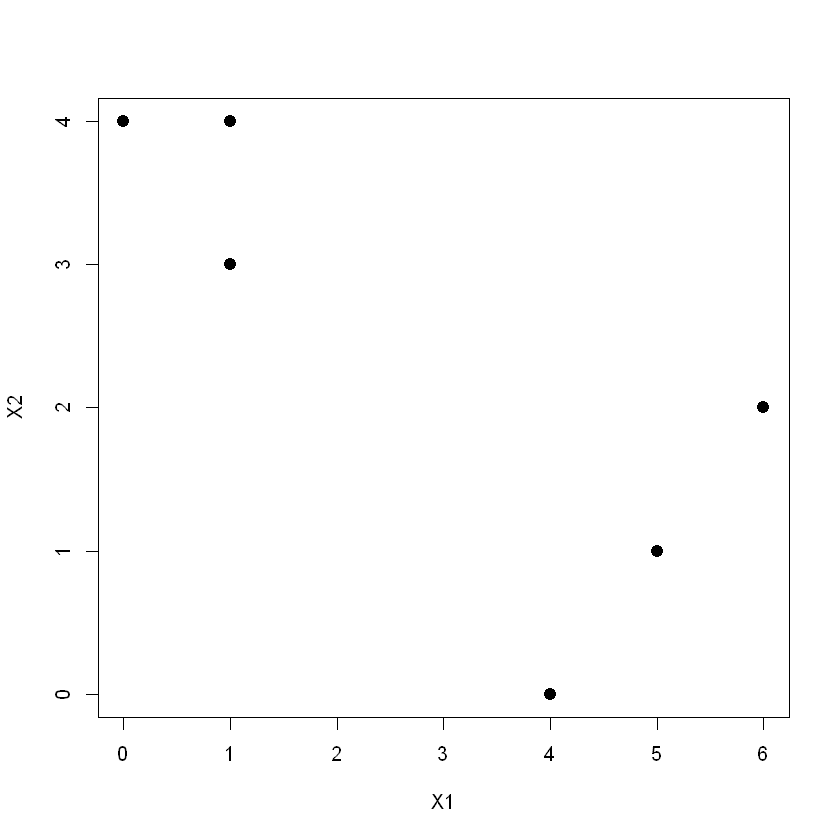

In [40]:
plot(obs, cex = 2, pch = 20)

In [41]:
# (b)
set.seed(1)
labels <- sample(2, nrow(x), replace = TRUE)
labels

[1] 1 2 1 1 2 1

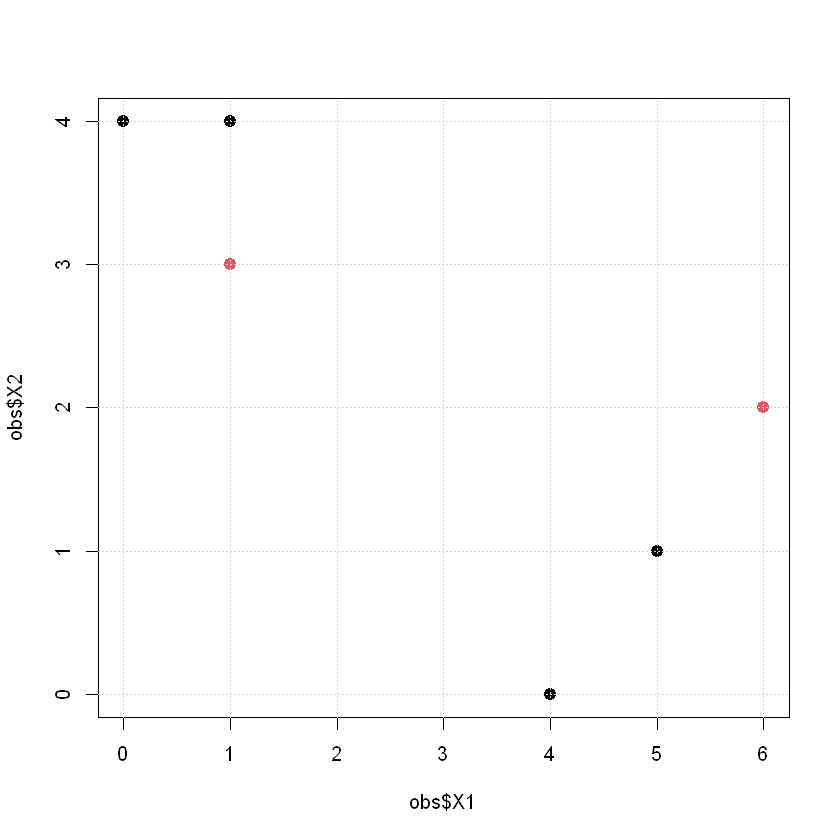

In [42]:
plot(obs$X1, obs$X2, cex = 2, pch = 20, col = labels)
grid()

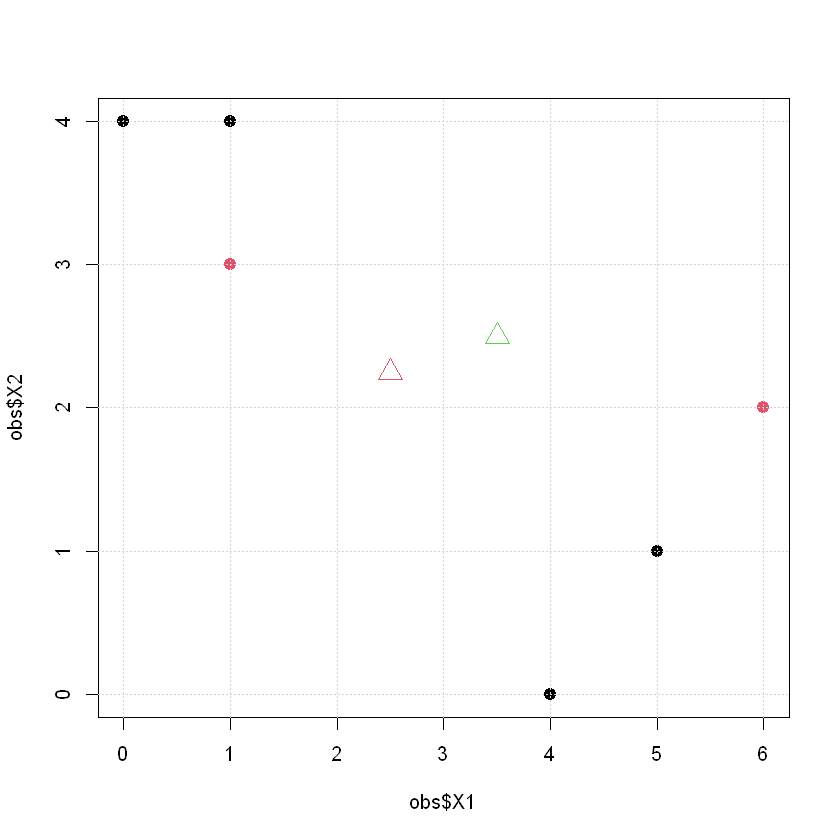

In [43]:
# (c)
centroid_clust1 <- c(mean(obs[labels == 1, 1]), mean(obs[labels == 1, 2]))
centroid_clust2 <- c(mean(obs[labels == 2, 1]), mean(obs[labels == 2, 2]))

plot(obs$X1, obs$X2, col = labels, pch = 20, cex = 2)
points(centroid_clust1[1], centroid_clust1[2], col = 2, cex = 2, pch = 2)
points(centroid_clust2[1], centroid_clust2[2], col = 3, cex = 2, pch = 2)
grid()

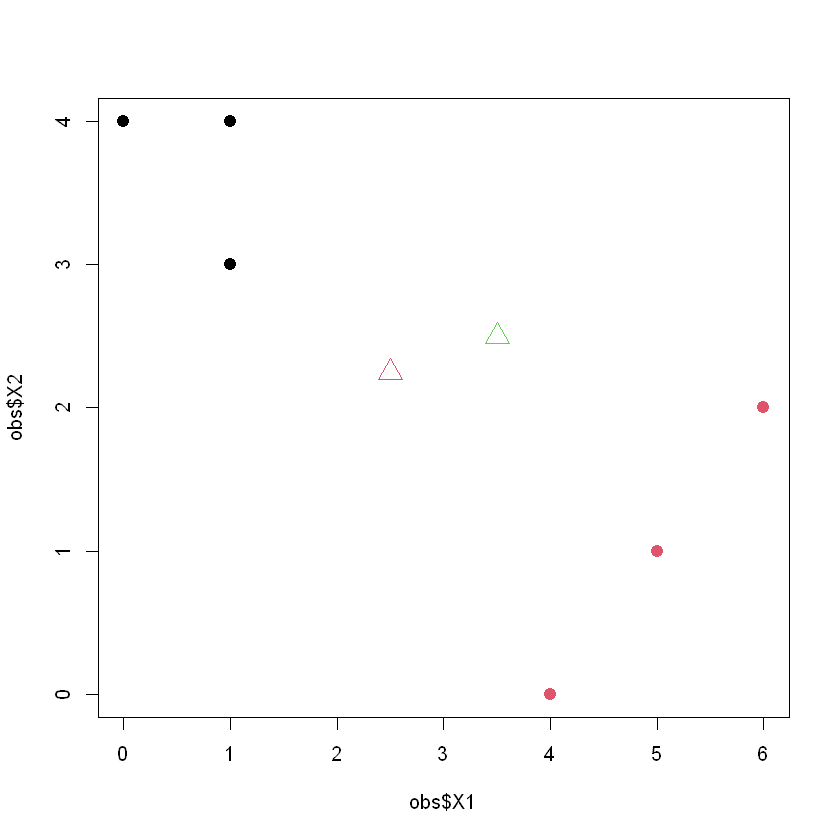

In [51]:
# (d)
labels <- c(1, 1, 1, 2, 2, 2)
plot(obs$X1, obs$X2, col = labels, pch = 20, cex = 2)
points(centroid_clust1[1], centroid_clust1[2], col = 2, cex = 2, pch = 2)
points(centroid_clust2[1], centroid_clust2[2], col = 3, cex = 2, pch = 2)

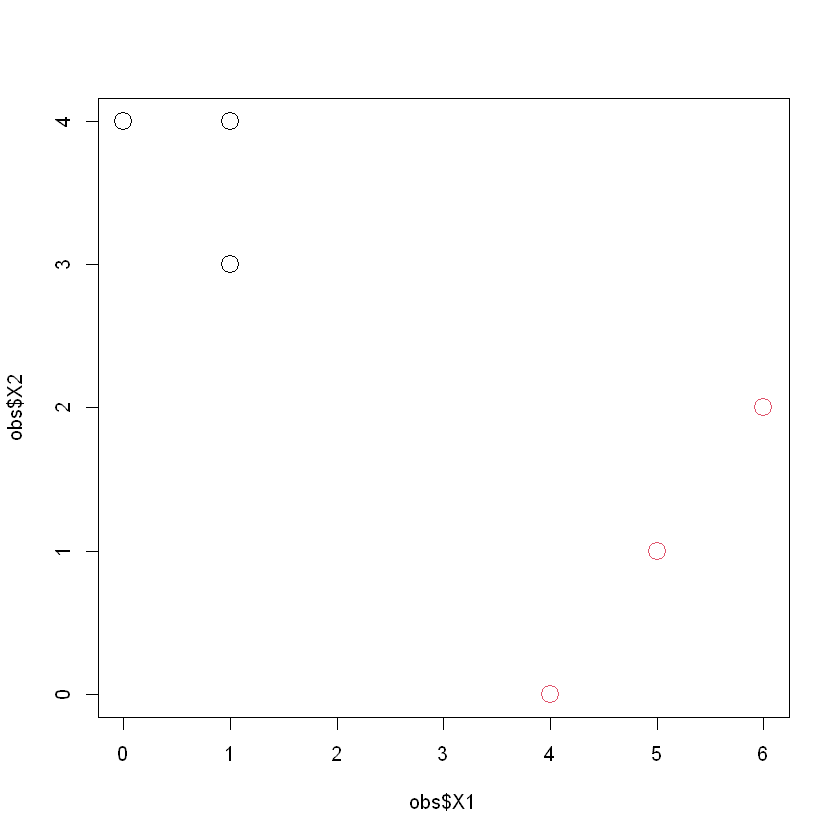

In [56]:
# (f)
plot(obs$X1, obs$X2, col=labels, cex = 2)

#### Exercise 8 p416

In [67]:
# (a)
library(ISLR)
pr.out = prcomp(USArrests, scale=TRUE)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
round(pve,10)

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [68]:
# (b)
loadings <- pr.out$rotation
scale_USArrests <- scale(USArrests)
sumvar <- sum(apply(as.matrix(scale_USArrests)^2, 2, sum))
round(apply((as.matrix(scale_USArrests) %*% loadings)^2, 2, sum) / sumvar,10)

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

#### Exercise 9 p416

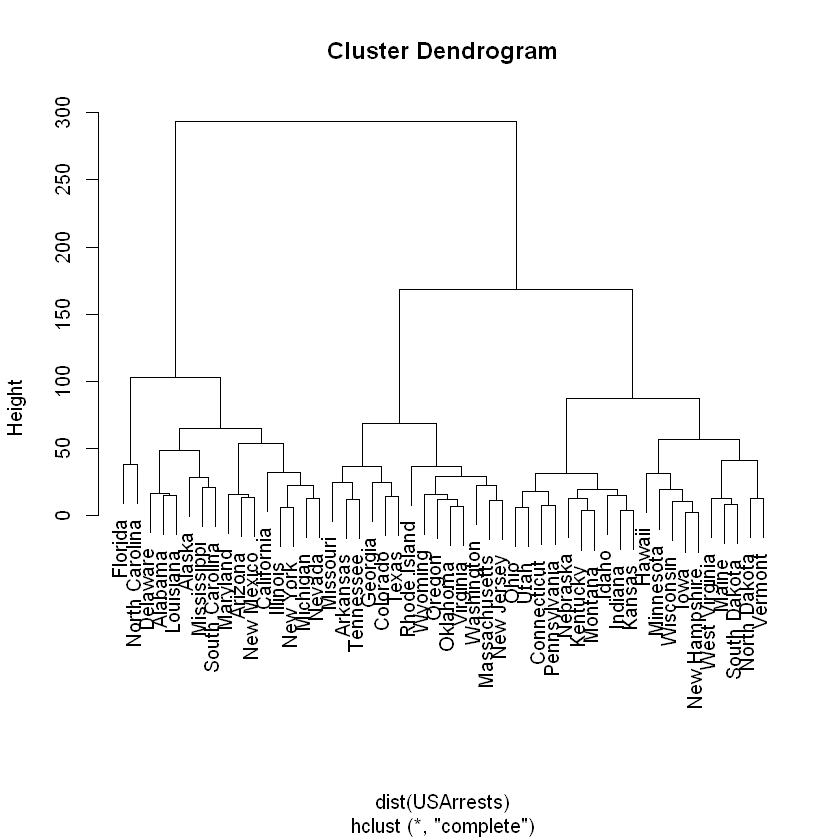

In [72]:
# (a)
set.seed(0)
hierarchical_clust_complete <- hclust(dist(USArrests), method = "complete")
plot(hierarchical_clust_complete)

In [74]:
# (b)
cutree(hierarchical_clust_complete, k=3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

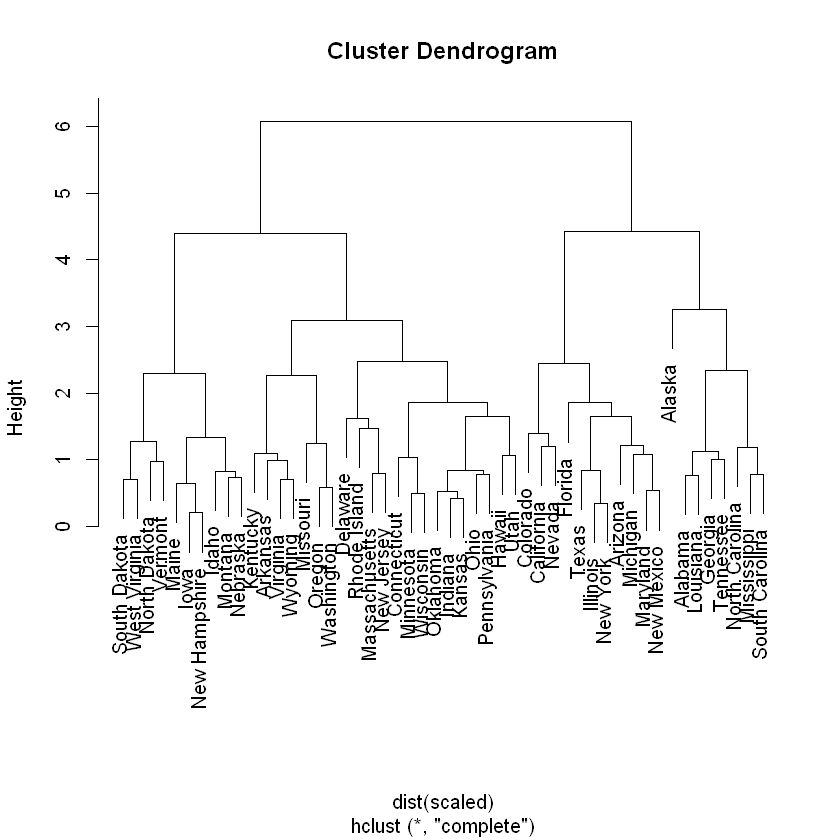

In [75]:
# (c)
scaled <- scale(USArrests)
hierarchical_clust_complete_sd <- hclust(dist(scaled), method = "complete")
plot(hierarchical_clust_complete_sd)

In [76]:
# (d)
cutree(hierarchical_clust_complete_sd, k=3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [ ]:
## Scaling the variables changes the final clusters.

#### Exercise 10 p417

In [105]:
# (a)
set.seed(1)
x <- matrix(rnorm(20 * 3 * 50, sd = 0.001), ncol = 50)

In [106]:
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1

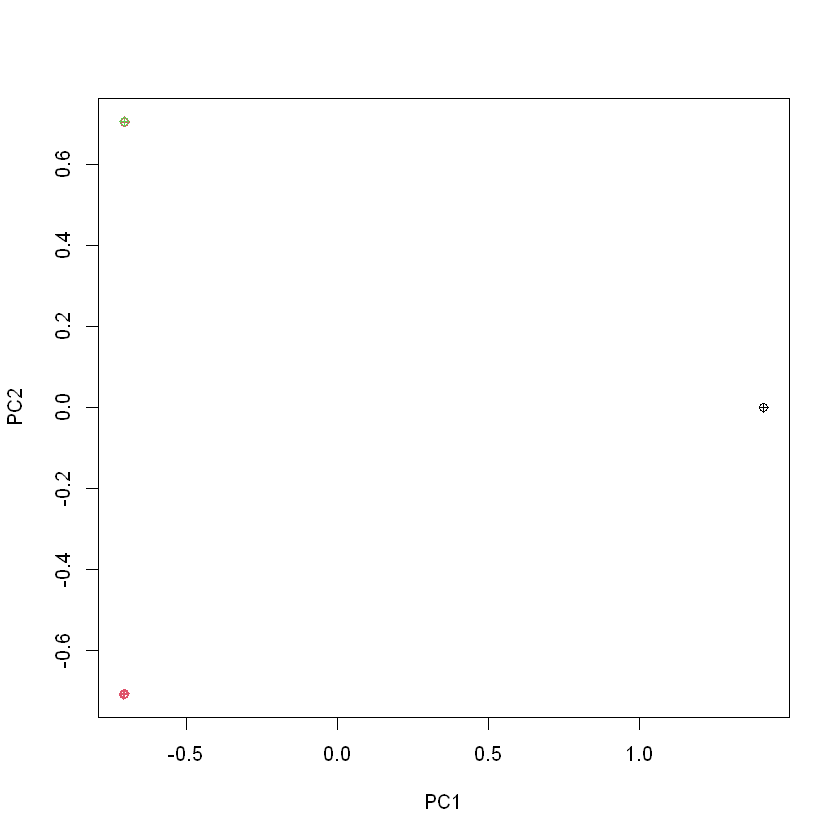

In [107]:
# (b)
pca.out <- prcomp(x)
plot(pca.out$x[,1:2], col = 1:3, pch = 10)

In [108]:
# (c)
k_means.out = kmeans(x, 3, nstart=30)
table(c(rep(1,20), rep(2,20), rep(3,20)), k_means.out$cluster)

   
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0

In [109]:
# (d)
k_means.out <- kmeans(x, 2, nstart = 30)
table(c(rep(1,20), rep(2,20), rep(3,20)), k_means.out$cluster)

   
     1  2
  1 20  0
  2  0 20
  3 20  0

In [110]:
# (e)
k_means.out <- kmeans(x, 4, nstart = 30)
table(c(rep(1,20), rep(2,20), rep(3,20)), k_means.out$cluster)

   
     1  2  3  4
  1 10  0 10  0
  2  0 20  0  0
  3  0  0  0 20

In [111]:
# (f)
k_means.out <- kmeans(pca.out$x[,1:2], 3, nstart = 30)
table(c(rep(1,20), rep(2,20), rep(3,20)), k_means.out$cluster)

   
     1  2  3
  1 20  0  0
  2  0 20  0
  3  0  0 20

In [112]:
# (g)
k_means.out <- kmeans(scale(x), 3, nstart = 30)
table(c(rep(1,20), rep(2,20), rep(3,20)), k_means.out$cluster)

   
     1  2  3
  1  0  8 12
  2 16  4  0
  3  1 12  7